In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
arx= 'datos/fpasabanda_R50.csv'

df_R50 = pd.read_csv(arx)

arx= 'datos/fpasabanda_R100.csv'

df_R100 = pd.read_csv(arx)

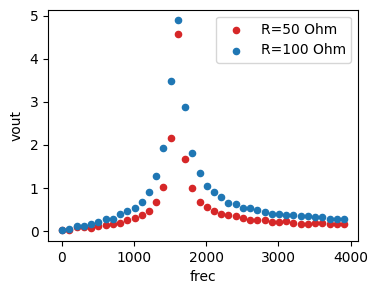

In [51]:
fig,ax = plt.subplots(figsize=(4,3))

df_R50.plot( x='frec', y="vout", ax=ax, kind='scatter', label='R=50 Ohm',color='C3' )

df_R100.plot( x='frec', y="vout", ax=ax , kind='scatter', label='R=100 Ohm')

plt.show()

### Función de transferencia

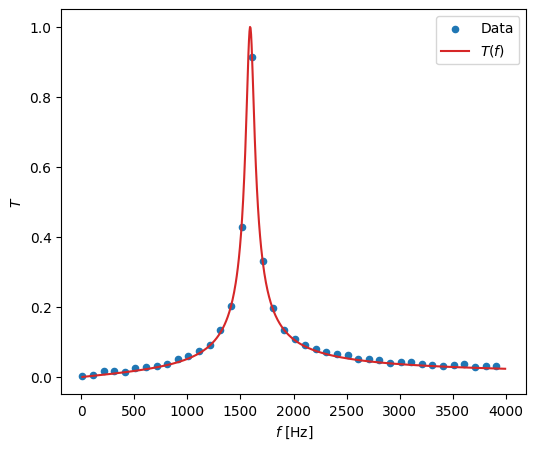

In [52]:
df_R50["T"] = df_R50["vout"]/df_R50["vin"]

R=50
L=100e-3
C=100e-9

X = lambda w: w*L - 1.0/(w*C) 

T = lambda f: 1.0/(np.sqrt( 1+ ( X(2*np.pi*f)/R )**2 ))

f = np.arange( 10,4000,5 )


fig,ax = plt.subplots( figsize=(6,5) )

df_R50.plot( x='frec', y='T', kind='scatter', ax=ax , label='Data')

ax.plot( f, T(f),c='C3' ,label='$T(f)$')

ax.set_xlabel("$f$ [Hz]")
ax.set_ylabel("$T$ ")
plt.legend()
plt.show()

### Atenuación

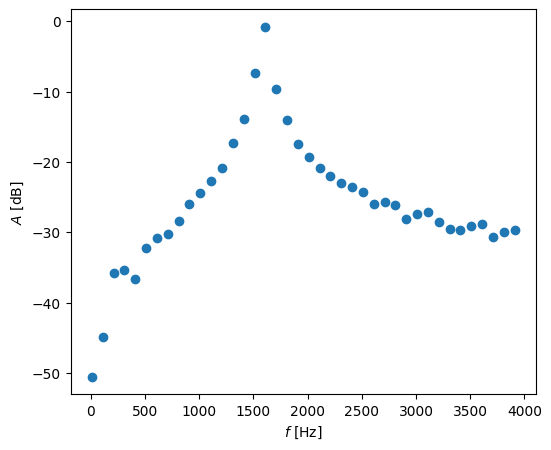

In [53]:
A = lambda t: 20*np.log10(t)

T = df_R50["T"].to_numpy()
f = df_R50["frec"].to_numpy()

fig,ax = plt.subplots(figsize=(6,5))

ax.scatter( f, A(T),c='C0'  )

ax.set_xlabel("$f$ [Hz]")
ax.set_ylabel("$A$ [dB]")
plt.show()



### Potencia

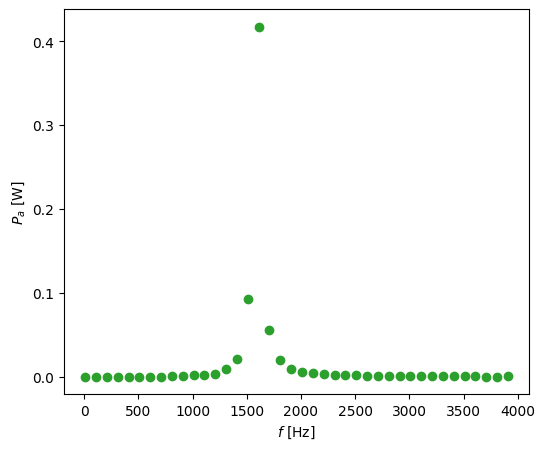

In [54]:
P = np.array( [ v*v for v in df_R50["vout"].to_numpy()] )/R

f = df_R50["frec"].to_numpy()

fig,ax = plt.subplots(figsize=(6,5))

ax.scatter( f, P,c='C2'  )

ax.set_xlabel("$f$ [Hz]")
ax.set_ylabel("$P_a$ [W]")
plt.show()
